In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('../input/plant-pathology-2021-fgvc8/train.csv')
data.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


In [4]:
data.labels.count()

18632

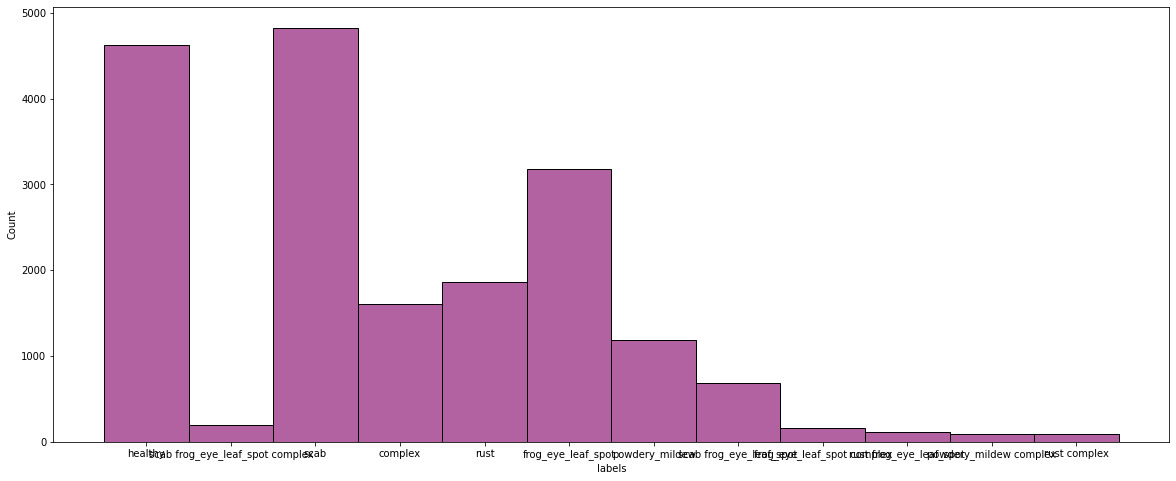

In [5]:
plt.figure(figsize=(20,8))
sns.histplot(data.labels, color=sns.color_palette('magma')[2])
plt.show()

In [6]:
xdata=data.drop(['image'],axis=1)
ndata=pd.get_dummies(xdata)
n_data = pd.concat([data.image, ndata], axis=1)
n_data.head()

,image,labels_complex,labels_frog_eye_leaf_spot,labels_frog_eye_leaf_spot complex,labels_healthy,labels_powdery_mildew,labels_powdery_mildew complex,labels_rust,labels_rust complex,labels_rust frog_eye_leaf_spot,labels_scab,labels_scab frog_eye_leaf_spot,labels_scab frog_eye_leaf_spot complex
0,800113bb65efe69e.jpg,0,0,0,1,0,0,0,0,0,0,0,0
1,8002cb321f8bfcdf.jpg,0,0,0,0,0,0,0,0,0,0,0,1
2,80070f7fb5e2ccaa.jpg,0,0,0,0,0,0,0,0,0,1,0,0
3,80077517781fb94f.jpg,0,0,0,0,0,0,0,0,0,1,0,0
4,800cbf0ff87721f8.jpg,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
mb = MultiLabelBinarizer().fit(data.labels.apply(lambda x : x.split()))
labels = pd.DataFrame(mb.transform(data.labels.apply(lambda x : x.split())), columns = mb.classes_)
new_data = pd.concat([data["image"], labels], axis=1)
new_data.head()
#from https://www.kaggle.com/code/andyhsueh/fgvc8-384-b4-0716

,image,complex,frog_eye_leaf_spot,healthy,powdery_mildew,rust,scab
0,800113bb65efe69e.jpg,0,0,1,0,0,0
1,8002cb321f8bfcdf.jpg,1,1,0,0,0,1
2,80070f7fb5e2ccaa.jpg,0,0,0,0,0,1
3,80077517781fb94f.jpg,0,0,0,0,0,1
4,800cbf0ff87721f8.jpg,1,0,0,0,0,0


In [9]:
c_complex=0
for i in range(0,len(new_data)):
    if new_data.complex[i]==1:
        c_complex=c_complex+1
        
c_frog=0
for i in range(0,len(new_data)):
    if new_data.frog_eye_leaf_spot[i]==1:
        c_frog=c_frog+1
        
        
c_healthy=0
for i in range(0,len(new_data)):
    if new_data.healthy	[i]==1:
        c_healthy=c_healthy+1
        
c_powdery=0
for i in range(0,len(new_data)):
    if new_data.powdery_mildew[i]==1:
        c_powdery=c_powdery+1
        
c_rust=0
for i in range(0,len(new_data)):
    if new_data.rust[i]==1:
        c_rust=c_rust+1
        
c_scab=0
for i in range(0,len(new_data)):
    if new_data.scab[i]==1:
        c_scab=c_scab+1

In [10]:
y=[c_complex,c_frog,c_healthy,c_powdery,c_rust,c_scab]
l=['complex','frog_eye_leaf_spot','healthy','powdery_mildew','rust','scab']

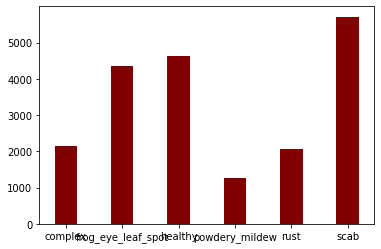

In [11]:
plt.bar(l,y, color ='maroon',
        width = 0.4)
plt.show()

In [12]:
train_image='../input/plant-pathology-2021-fgvc8/train_images'
test_image='../input/plant-pathology-2021-fgvc8/test_images'

In [13]:
submission = pd.read_csv('../input/plant-pathology-2021-fgvc8/sample_submission.csv')
submission

,image,labels
0,85f8cb619c66b863.jpg,healthy
1,ad8770db05586b59.jpg,healthy
2,c7b03e718489f3ca.jpg,healthy


In [14]:
# Importing all necessary libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [15]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [16]:
batch=34
size=(150,150)
train_generator = train_datagen.flow_from_dataframe(
                  new_data,
                  directory = train_image, 
                  x_col = 'image',
                  y_col = new_data.columns.tolist()[1:],
                  subset = "training",
                  color_mode = "rgb",
                  target_size = size,
                  class_mode = "raw",
                  batch_size = batch,
                  shuffle = True,)



Found 18632 validated image filenames.


In [17]:
test_generator = test_datagen.flow_from_dataframe(
                  submission,
                  directory = test_image,
                  x_col = 'image',
                  y_col = 'labels',
                  class_mode = None,
                  batch_size=8,
                  target_size = size,
                  color_mode="rgb",
                  shuffle = False,)

Found 3 validated image filenames.


(34, 150, 150, 3)


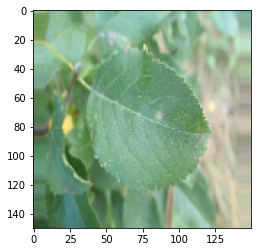

In [18]:
image=next(train_generator)
plt.imshow(image[0][0,:,:,:])
print(image[0].shape)
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
])


2022-07-23 18:15:02.263934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 18:15:02.408758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 18:15:02.409563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 18:15:02.410780: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [ ]:
history=model.fit(train_generator ,epochs=1, batch_size=64)

In [ ]:
pred=model.predict(test_generator)
pred[0][0]

In [ ]:
label_list=['complex ','frog_eye_leaf_spot ','healthy ','powdery_mildew ','rust ','scab']
strs = ['']*len(pred)
strs

In [ ]:

for i in range(0,len(pred)):
    for j in range(0,6):
        if pred[i][j]==1:
            strs[i]=strs[i]+label_list[j]
            
strs

In [ ]:

for i in range(0,len(pred)):
    submission.labels[i]=strs[i]
    
submission

In [ ]:
submission.to_csv("submission.csv", index=False)